In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
m1 = np.array([2, 1])
m2 = np.array([-2, 1])
Cov1 = np.array([[1, -1], [-1, 4]])
Cov2 = np.array([[4, 0], [0, 1]])

In [27]:
x = np.linspace(-11, 10, 100)
y = np.linspace(-11, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.stack([X, Y], axis=2)

In [28]:
def mahalanobis_distance(X, Y, mean, cov):
    inv_cov = np.linalg.inv(cov)
    diff_x = X - mean[0]
    diff_y = Y - mean[1]
    return inv_cov[0, 0] * diff_x**2 + 2 * inv_cov[0, 1] * diff_x * diff_y + inv_cov[1, 1] * diff_y**2

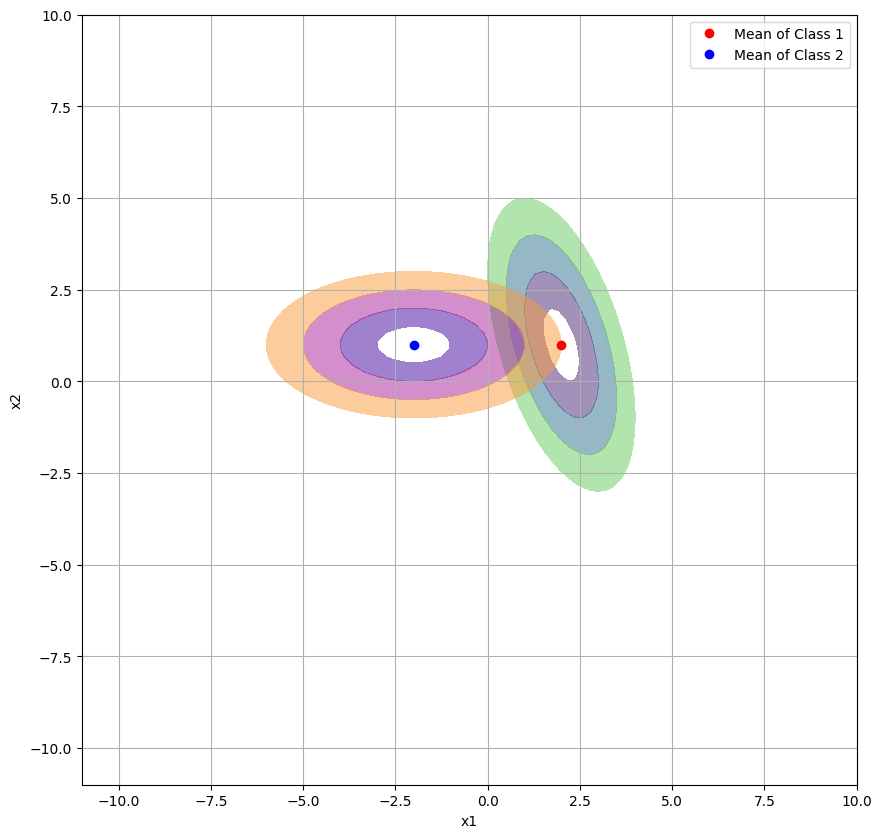

In [29]:
# Compute Mahalanobis distance values
levels1 = mahalanobis_distance(X, Y, m1, Cov1)
levels2 = mahalanobis_distance(X, Y, m2, Cov2)

# Define contour levels
B2_raw_values = [0.5, 1.0, 1.5, 2.0]

B2_values = [v**2 for v in B2_raw_values]

# Plot filled contours
fig, ax = plt.subplots(figsize=(10, 10))

# Plot filled contours for Class 1 and Class 2
contours1 = ax.contourf(X, Y, levels1, levels=B2_values, cmap='viridis', alpha=0.5)
contours2 = ax.contourf(X, Y, levels2, levels=B2_values, cmap='plasma', alpha=0.5)

# Plot class means
ax.plot(m1[0], m1[1], 'ro', label='Mean of Class 1')
ax.plot(m2[0], m2[1], 'bo', label='Mean of Class 2')

# Add legend, labels, and grid
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid(True)

plt.show()

In [30]:
import numpy as np

def decision_boundary(m1, Cov1, m2, Cov2, log_prior_ratio, X, Y):
    inv_Cov1 = np.linalg.inv(Cov1)
    inv_Cov2 = np.linalg.inv(Cov2)

    # Create a 2D array from meshgrid
    data = np.column_stack((X.flatten(), Y.flatten()))  # Create 2D array with coordinate pairs

    # Calculate Mahalanobis distances for each class
    dM1 = np.dot(data - m1, inv_Cov1)  
    dM1_squared = np.sum(dM1 * (data - m1), axis=1)  

    dM2 = np.dot(data - m2, inv_Cov2) 
    dM2_squared = np.sum(dM2 * (data - m2), axis=1)  

    # Calculate the decision function using the squared distances
    decision = dM1_squared - dM2_squared 

    decision += np.log(np.linalg.det(Cov1) / np.linalg.det(Cov2)) + 2 * log_prior_ratio

    # Reshape to the same shape as X and Y
    decision = decision.reshape(X.shape) 

    return decision


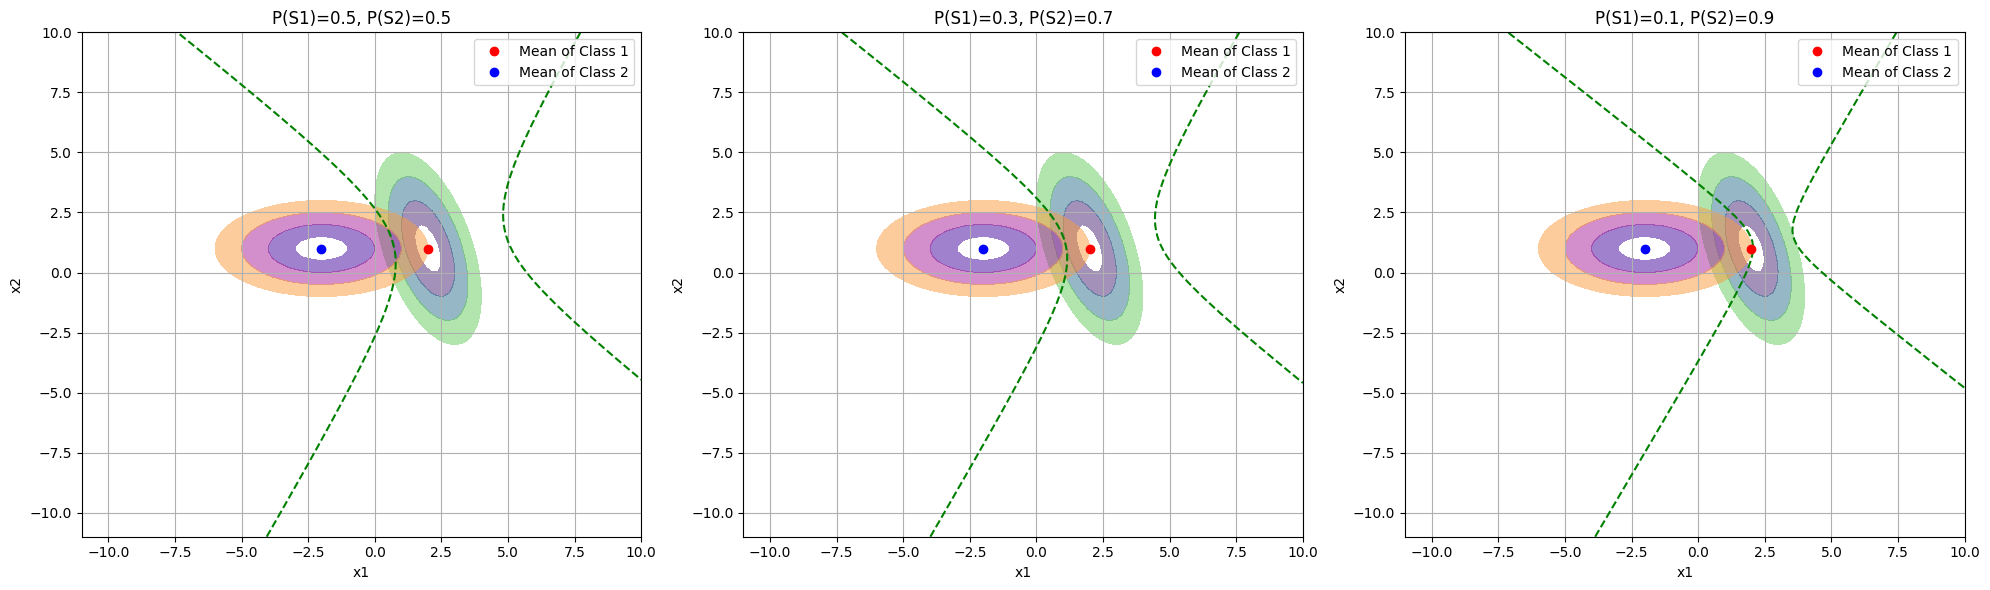

In [31]:
# Plot decision boundaries for each case
priors = [(0.5, 0.5), (0.3, 0.7), (0.1, 0.9)]
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Loop over priors to plot decision boundaries
for i, (p1, p2) in enumerate(priors):
    log_prior_ratio = np.log(p2 / p1)

    Z = decision_boundary(m1, Cov1, m2, Cov2, log_prior_ratio, X, Y)
    
    # Calculate the decision boundary

    axs[i].contourf(X, Y, levels1, levels=B2_values, cmap='viridis', alpha=0.5)  # Class 1 circles
    axs[i].contourf(X, Y, levels2, levels=B2_values, cmap='plasma', alpha=0.5)  # Class 2 circles
    
    # Plot the decision boundary
    axs[i].contour(X, Y, Z, levels=[0], colors='green', linestyles='dashed')  # Boundary
    
    # Plot the class means
    axs[i].plot(m1[0], m1[1], 'ro', label='Mean of Class 1')
    axs[i].plot(m2[0], m2[1], 'bo', label='Mean of Class 2')
    
    # Titles, labels, and grid
    axs[i].set_title(f'P(S1)={p1}, P(S2)={p2}')
    axs[i].set_xlabel('x1')
    axs[i].set_ylabel('x2')
    axs[i].legend()
    axs[i].grid(True)

# Save the plot to a file
plt.tight_layout()
plt.show()

In [32]:
Cov2 = np.array([[4, 0], [0, 1]])  # Covariance matrix for Class 2
Cov1_cases = [
    4 * np.array([[1, -1], [-1, 4]]),  # Case (i)
    16 * np.array([[1, -1], [-1, 4]]),  # Case (ii)
    np.array([[2, 0], [0, 2]]),  # Case (iii) 
]

In [33]:
Cov1_cases

[array([[ 4, -4],
        [-4, 16]]),
 array([[ 16, -16],
        [-16,  64]]),
 array([[2, 0],
        [0, 2]])]

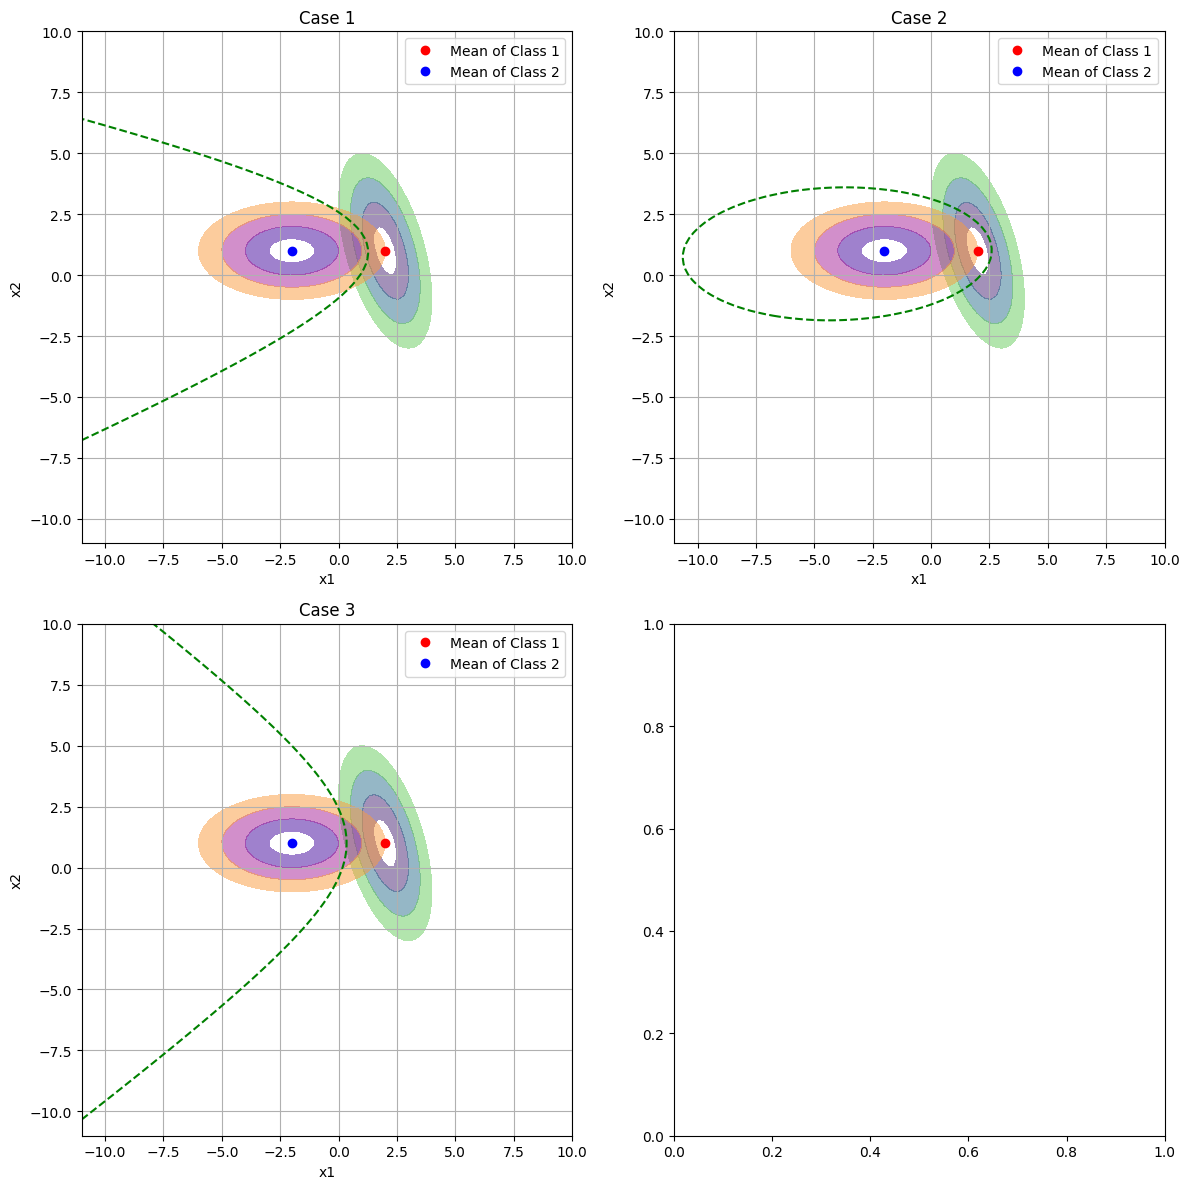

In [34]:
prior2=prior1=0.5

# Create subplots for part (d)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot for each covariance case
for i, cov1 in enumerate(Cov1_cases):
    # Calculate log prior ratio
    log_prior_ratio = np.log(prior2/prior1)

    # Compute the decision boundary
    Z = decision_boundary(m1, cov1, m2, Cov2, log_prior_ratio, X, Y)

    axs[i // 2][i % 2].contourf(X, Y, levels1, levels=B2_values, cmap='viridis', alpha=0.5)  # Class 1 circles
    axs[i // 2][i % 2].contourf(X, Y, levels2, levels=B2_values, cmap='plasma', alpha=0.5)  # Class 2 circles
    
    # Plot decision boundaries
    axs[i // 2][i % 2].contour(X, Y, Z, levels=[0], colors='green', linestyles='dashed')  # Boundary
    
    # Plot class means
    axs[i // 2][i % 2].plot(m1[0], m1[1], 'ro', label='Mean of Class 1')
    axs[i // 2][i % 2].plot(m2[0], m2[1], 'bo', label='Mean of Class 2')
    
    # Titles, labels, and grid
    axs[i // 2][i % 2].set_title(f'Case {i + 1}')
    axs[i // 2][i % 2].set_xlabel('x1')
    axs[i // 2][i % 2].set_ylabel('x2')
    axs[i // 2][i % 2].legend()
    axs[i // 2][i % 2].grid(True)

plt.tight_layout()
plt.show()

In [35]:
Cov2 = np.array([[1, -1], [-1, 4]])  
Cov1_cases = [
    np.array([[1, -1], [-1, 4]])]

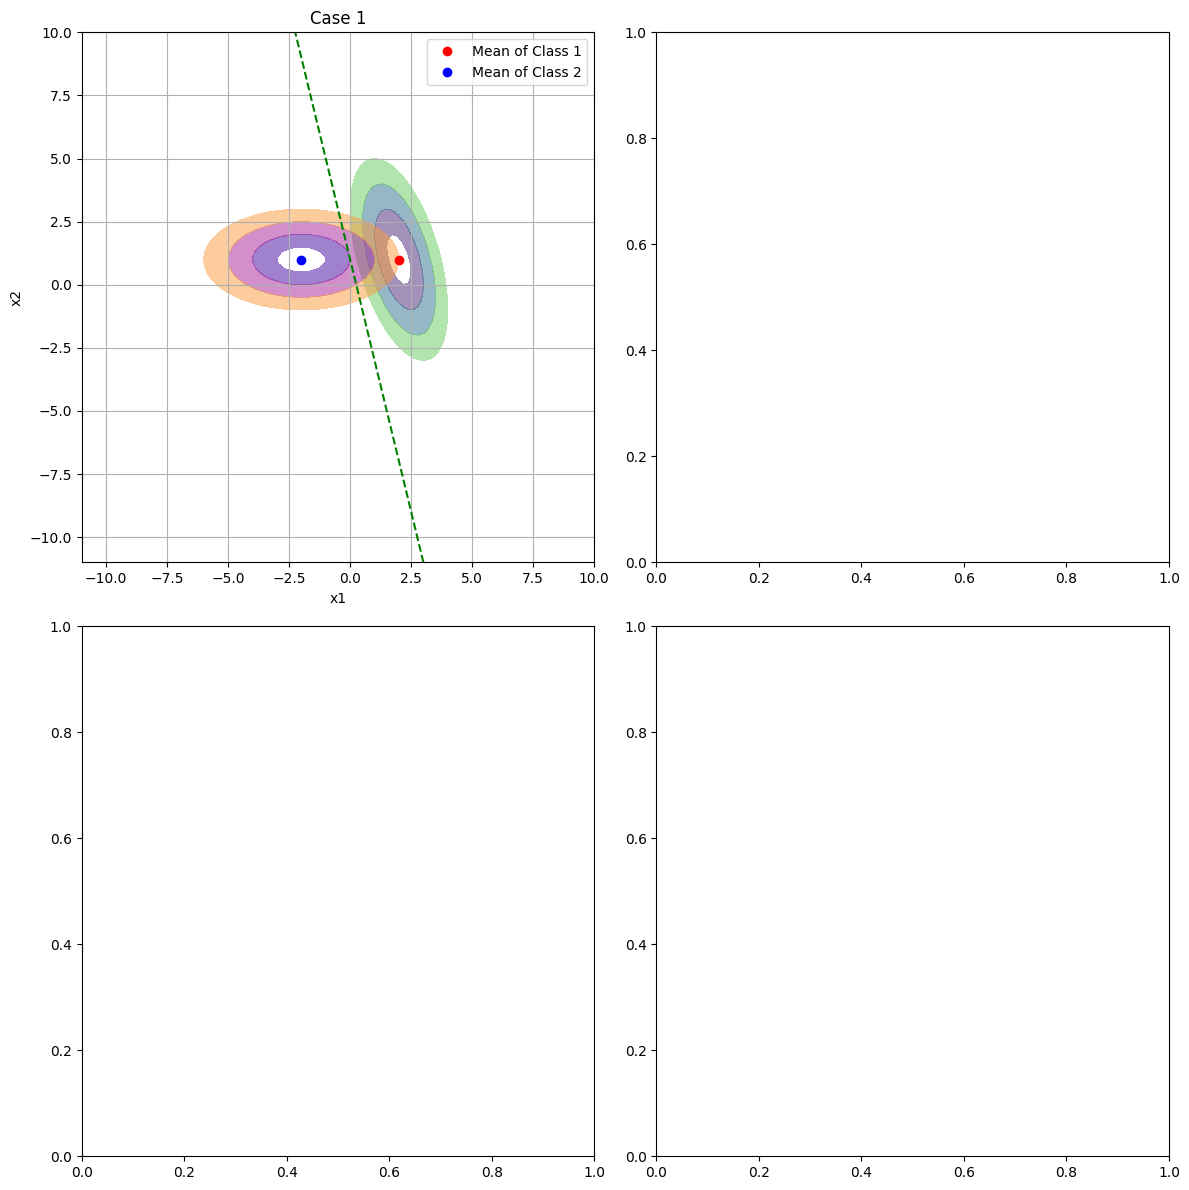

In [36]:
# Create subplots for part (d)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot for each covariance case
for i, cov1 in enumerate(Cov1_cases):
    # Calculate log prior ratio
    log_prior_ratio = np.log(prior2/prior1)

    # Compute the decision boundary
    Z = decision_boundary(m1, cov1, m2, Cov2, log_prior_ratio, X, Y)

    axs[i // 2][i % 2].contourf(X, Y, levels1, levels=B2_values, cmap='viridis', alpha=0.5)  # Class 1 circles
    axs[i // 2][i % 2].contourf(X, Y, levels2, levels=B2_values, cmap='plasma', alpha=0.5)  # Class 2 circles
    
    # Plot decision boundaries
    axs[i // 2][i % 2].contour(X, Y, Z, levels=[0], colors='green', linestyles='dashed')  # Boundary
    
    # Plot class means
    axs[i // 2][i % 2].plot(m1[0], m1[1], 'ro', label='Mean of Class 1')
    axs[i // 2][i % 2].plot(m2[0], m2[1], 'bo', label='Mean of Class 2')
    
    # Titles, labels, and grid
    axs[i // 2][i % 2].set_title(f'Case {i + 1}')
    axs[i // 2][i % 2].set_xlabel('x1')
    axs[i // 2][i % 2].set_ylabel('x2')
    axs[i // 2][i % 2].legend()
    axs[i // 2][i % 2].grid(True)

plt.tight_layout()
plt.show()